## Make plots for all materials
### Author: Henry Nachman
#### Last Updated: 2024-06-13


First, we will import the necessary packages...

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erf
from scipy.integrate import quad
import sys, os
from itertools import dropwhile
from fit_types import *


# Get the absolute path of the current script
abspath = os.path.abspath("material_plots.ipynb")
print(os.path.split(abspath))
path_to_tcFiles = f"{os.path.split(abspath)[0]}{os.sep}.."

('c:\\Users\\henac\\OneDrive - The University of Texas at Austin\\01_RESEARCH\\05_CMBS4\\Cryogenic_Material_Properties\\thermal_conductivity', 'material_plots.ipynb')


In [2]:
all_files = os.listdir(path_to_tcFiles)
exist_files = [file for file in all_files if file.startswith("tc_fullrepo")]
print(exist_files)
tc_file_date = exist_files[0][-12:-4]

TCdata = np.loadtxt(f"{path_to_tcFiles}{os.sep}tc_fullrepo_{tc_file_date}.csv", dtype=str, delimiter=',') # imports compilation file csv
headers = TCdata[0] # pulls the headers from the file
mat_names = TCdata[:,0] # makes an array of material names

['tc_fullrepo_20240618.csv', 'tc_fullrepo_20240618.txt']


In [3]:
def get_parameters(mat):
    mat_row = TCdata[int(np.argwhere(mat_names == mat)[0][0])] # searches material name array for mat specified above and return relevant row
    param_headers = headers[5:]
    fit_type = mat_row[1]
    num_hi = sum(1 for c in param_headers if c.isupper()) # searches for the number of low parameters (by lower case letter)
    num_low = sum(1 for c in param_headers if c.islower()) # searches for number of high parameters
    fit_params = mat_row 
    fit_params = np.char.replace(fit_params, "^", "0")
    # fit_range, low_param, hi_param, erf_param = np.array(mat_row[2:4], dtype=float), np.array(fit_params[:num_low], dtype=float), np.array(fit_params[num_low:-1], dtype=float), float(fit_params[-1])

    fit_range = np.array(mat_row[2:4], dtype=float) # pulls the fit range
    # loop through headers and if lower case add to low_param vice versa
    low_param = []
    hi_param = []
    for key in headers[5:]:
        if key.islower() and key != "erf param":
            low_param.append(float(fit_params[int(np.argwhere(headers == key)[0][0])]))
        elif key.isupper():
            hi_param.append(float(fit_params[int(np.argwhere(headers == key)[0][0])]))
        elif key == "erf param":
            erf_param = float(fit_params[int(np.argwhere(headers == key)[0][0])])

    # now we have a list of lower and upper parameters but, they might have trailing 0s if they have fewer parameters than other materials
    # so now we remove those trailing 0s
    def remove_trailing_zeros(arr):
        return list(dropwhile(lambda x: x == 0, arr[::-1]))
    low_param = remove_trailing_zeros(low_param)
    hi_param = remove_trailing_zeros(hi_param)
    if fit_type not in ["Nppoly", "polylog", "comppoly"]:
        low_param = low_param[::-1]
        hi_param = hi_param[::-1]
    # print(low_param, hi_param, erf_param)
    param_dictionary = {"fit_type":  fit_type,
                        "fit_range": fit_range,
                        "low_param": low_param,
                        "hi_param":  hi_param,
                        "erf_param": erf_param}
    return param_dictionary

Aluminum_1100 Nppoly


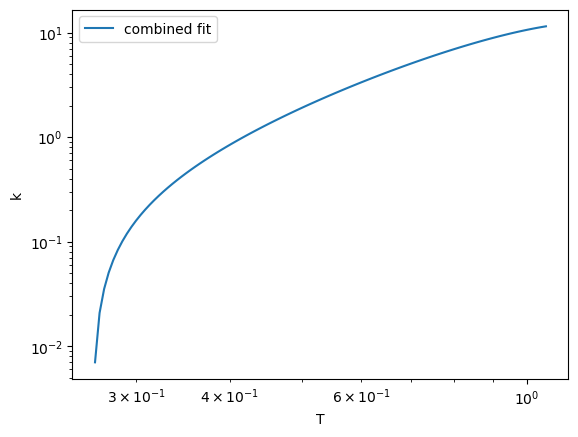

Aluminum_3003F polylog


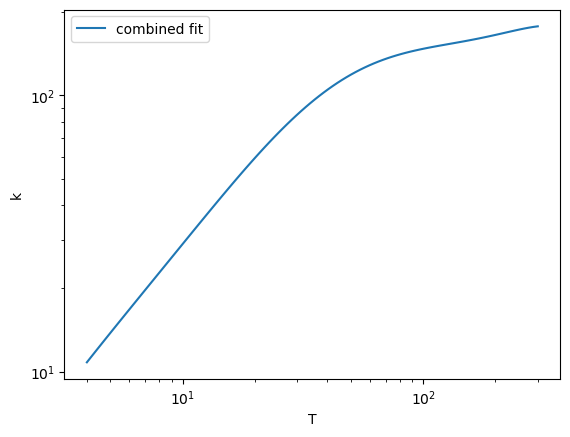

Aluminum_5083O polylog


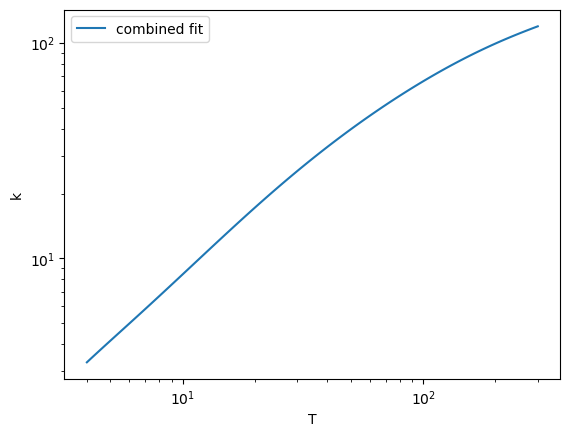

Aluminum_6061T6 polylog


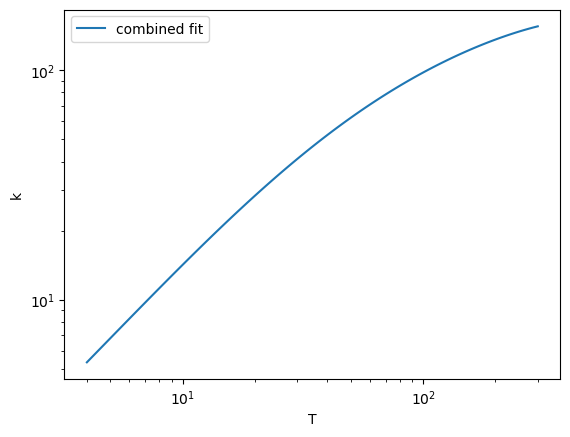

Aluminum_6063T5 polylog


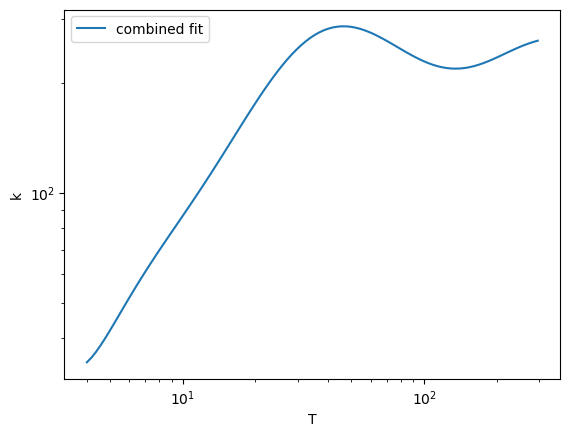

Beryllium_Copper polylog


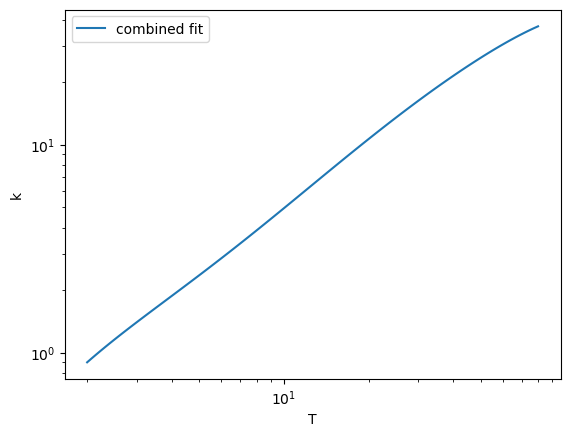

Brass polylog


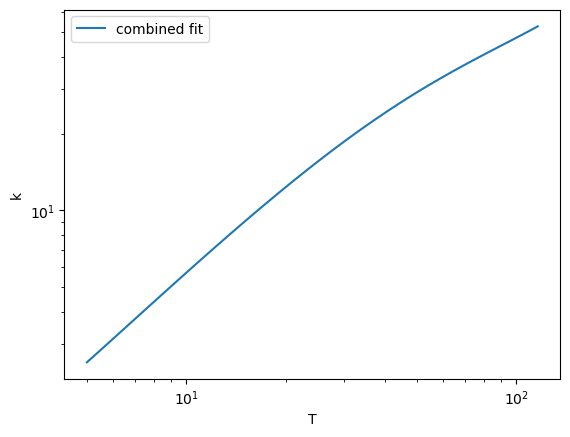

CFRP Nppoly


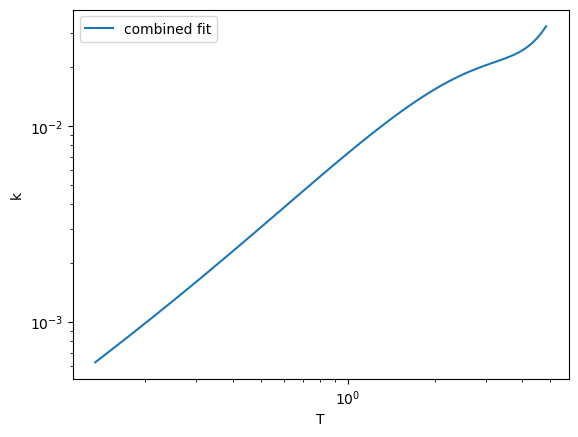

CFRP_Clearwater Nppoly


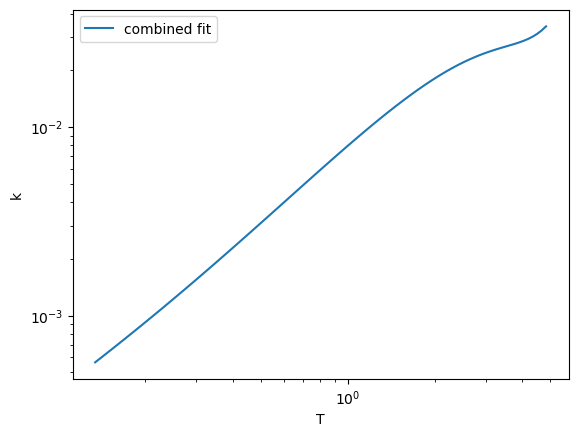

CFRP_DPP Nppoly


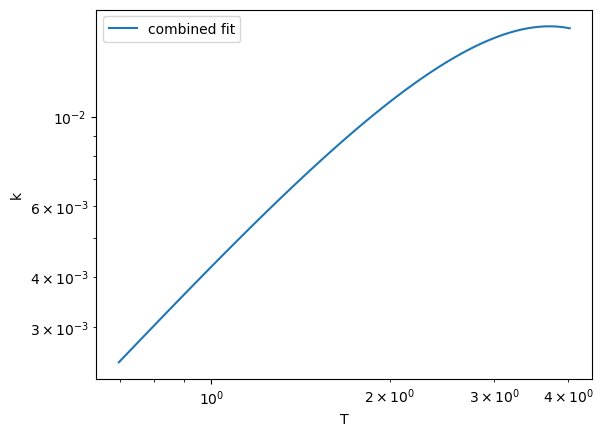

CFRP_Graphlite Nppoly


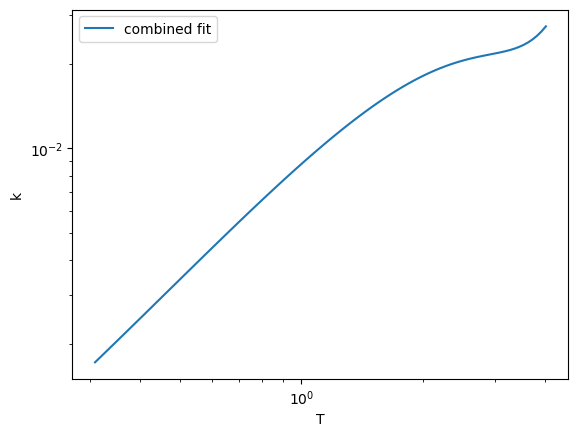

Constantan TchebyLnT


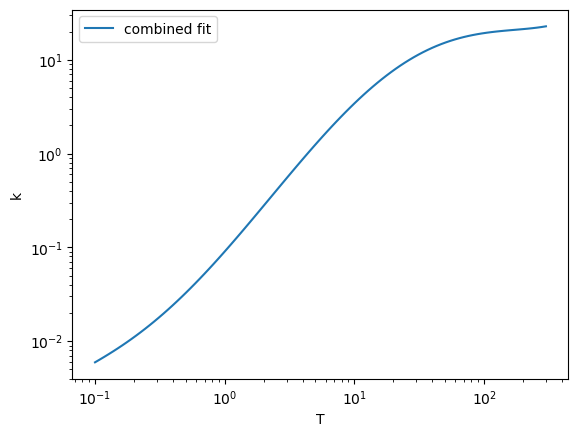

Cu_OFHC_RRR100 NIST-copperfit


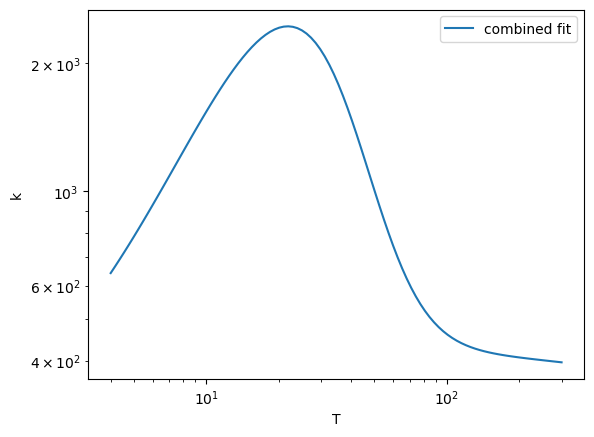

Cu_OFHC_RRR150 NIST-copperfit


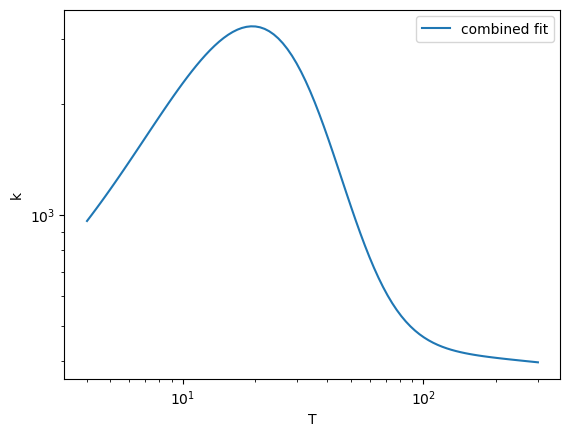

Cu_OFHC_RRR300 NIST-copperfit


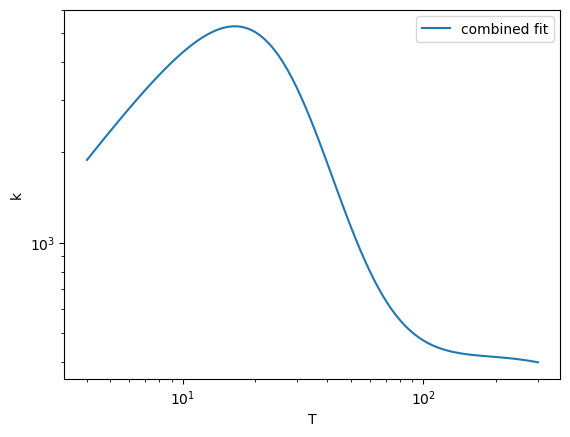

Cu_OFHC_RRR50 NIST-copperfit


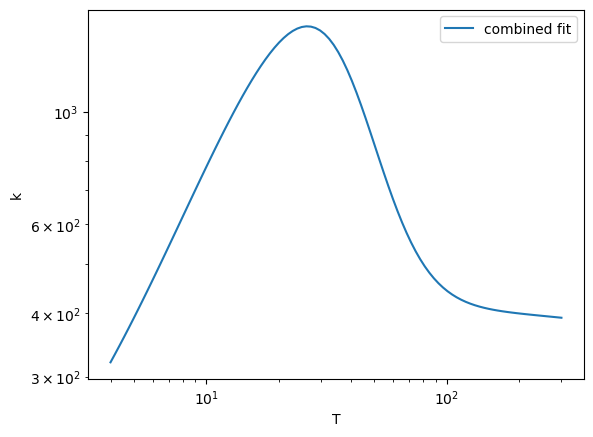

Cu_OFHC_RRR500 NIST-copperfit


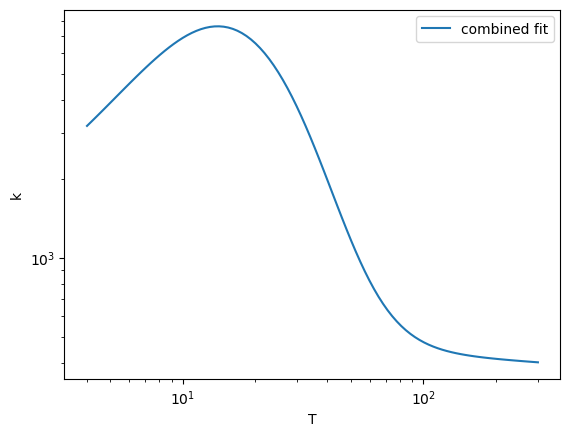

G10_CR_Normal polylog


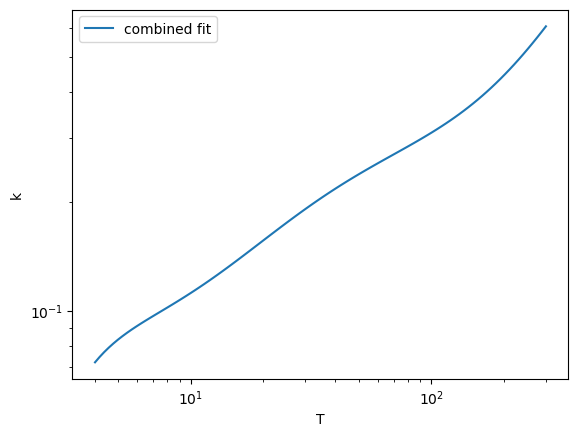

G10_CR_Warp polylog


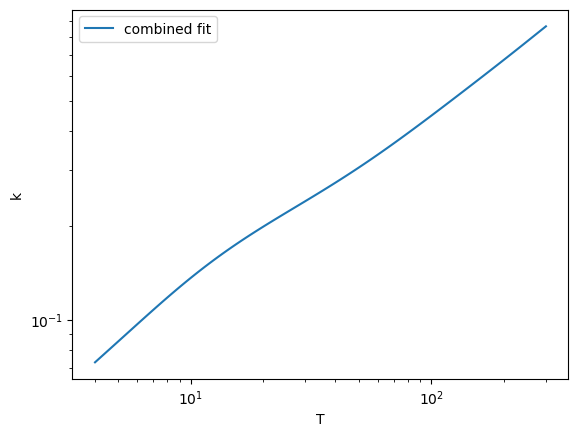

G10_FR4 Nppoly


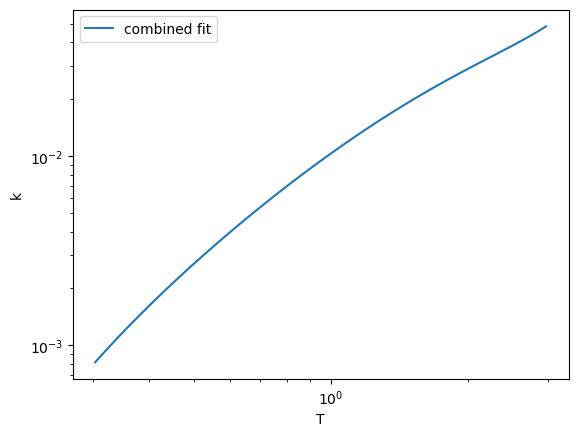

Glass_FabricPolyester_He_warp polylog


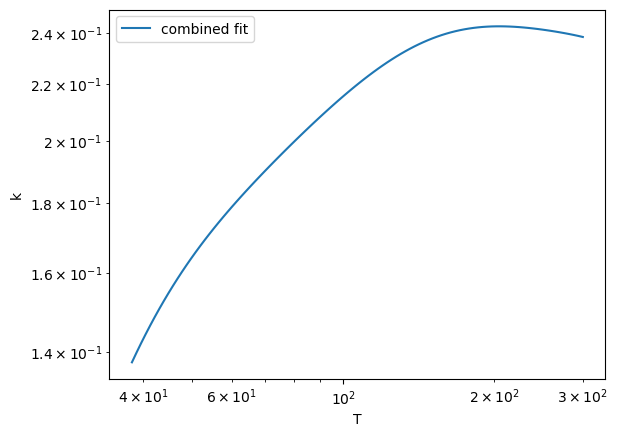

Glass_FabricPolyester_Ni_normal polylog


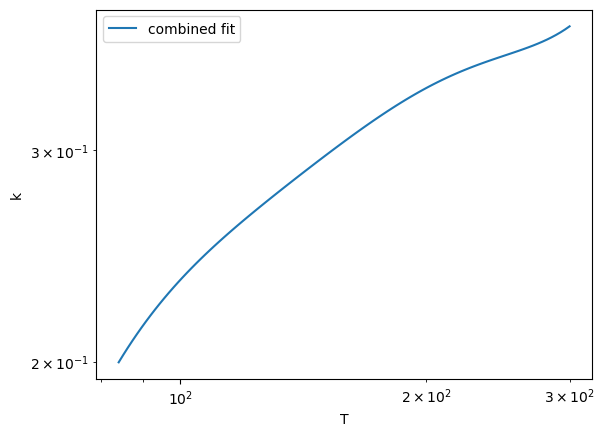

Glass_FabricPolyester_Ni_warp polylog


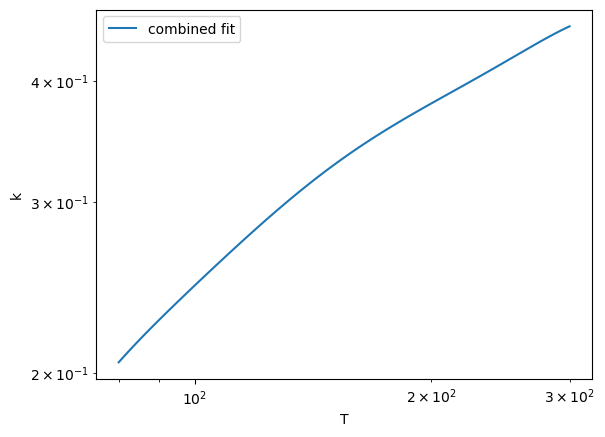

Graphite lowTextrapolate


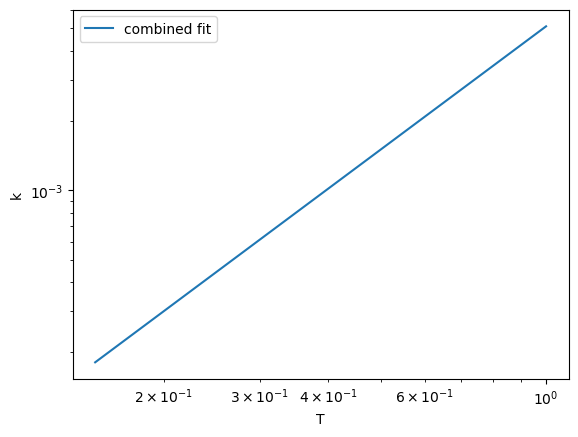

Graphite_a polylog


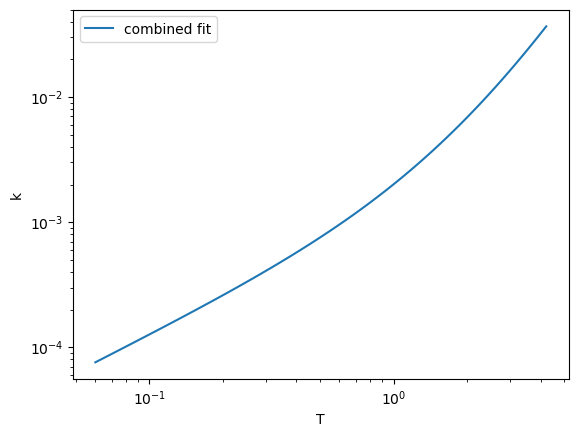

Graphite_brad lowTextrapolate


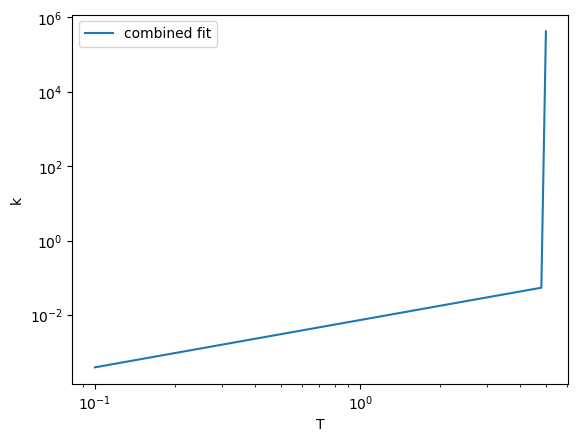

Graphite_p polylog


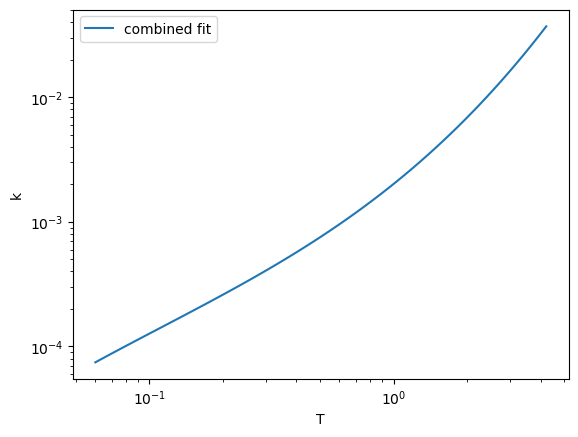

Inconel_718 polylog


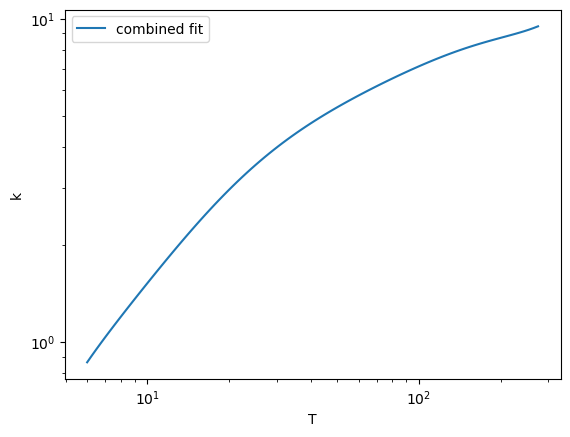

Invar_Fe36Ni polylog


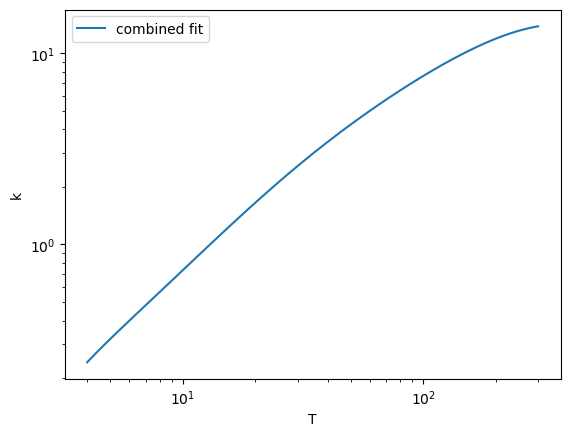

Kapton polylog


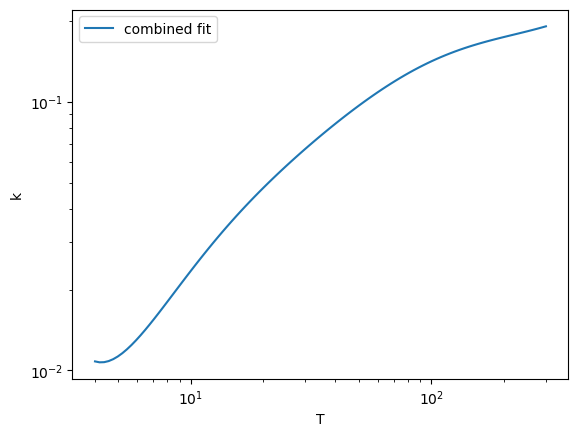

KaptonA polylog


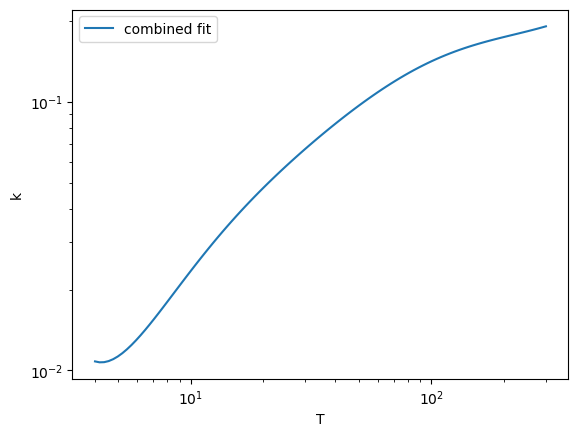

Ketron Nppoly


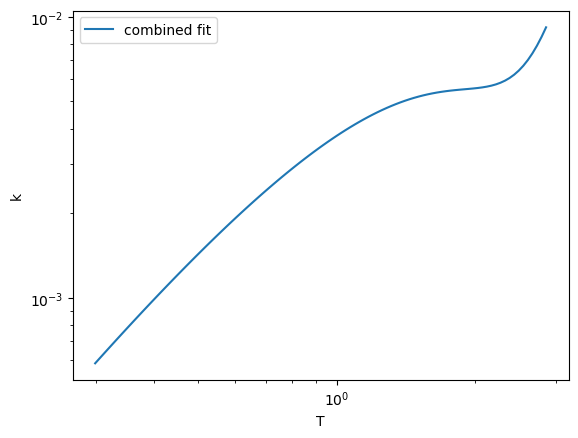

Kevlar49_Composite_Aramid NIST-experf


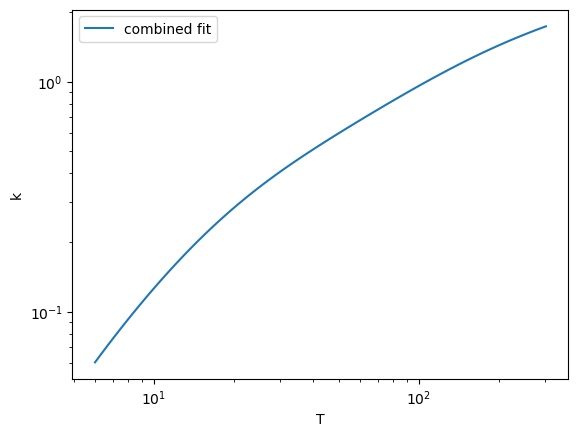

Kevlar49_Fiber_Aramid NIST-experf


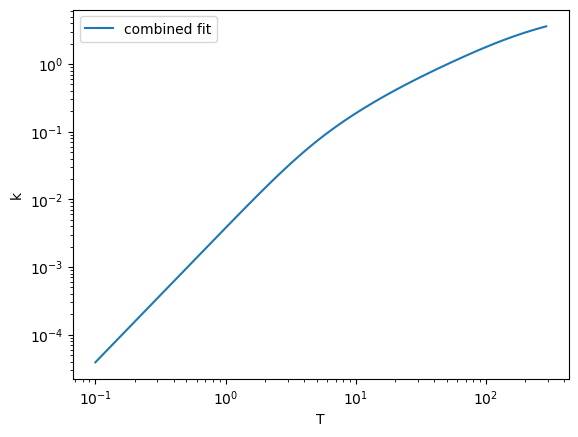

Lead polylog


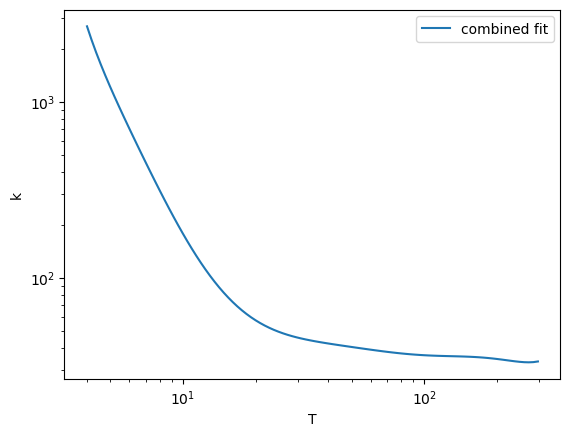

Macor Nppoly


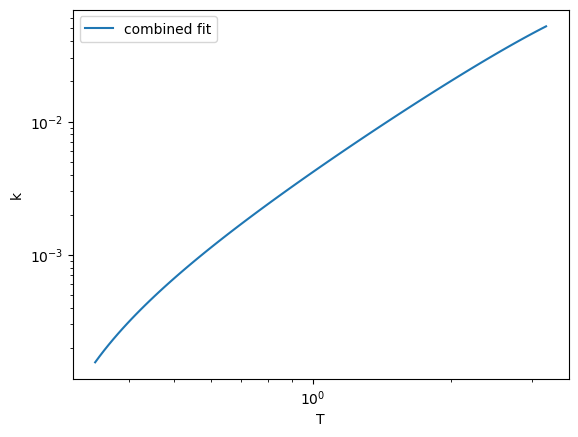

Manganin Nppoly


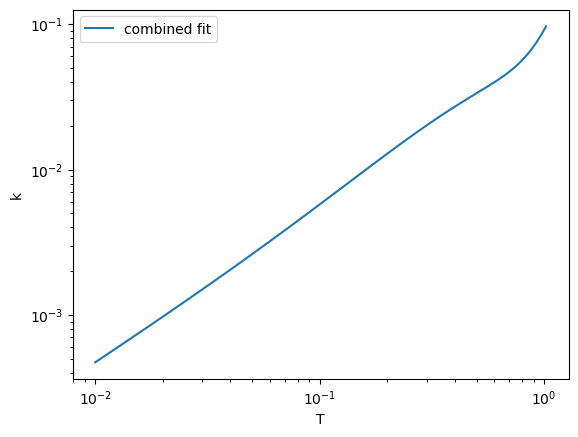

Molybdenum polylog


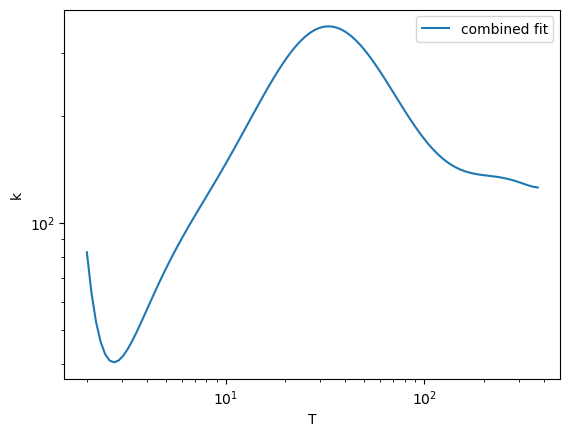

MylarPET polylog


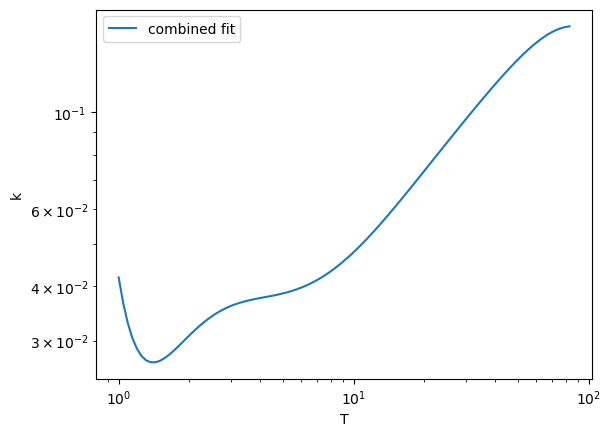

NbTi polylog


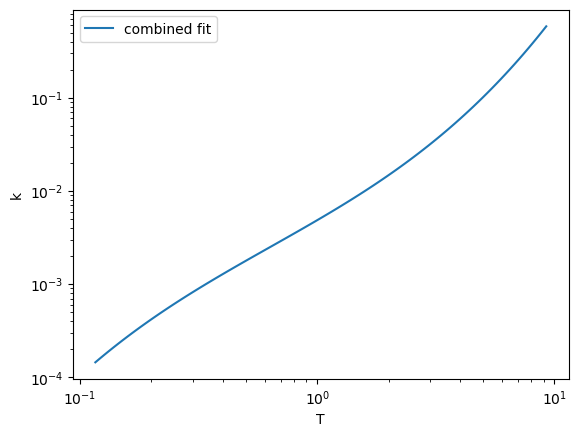

Nichrome polylog


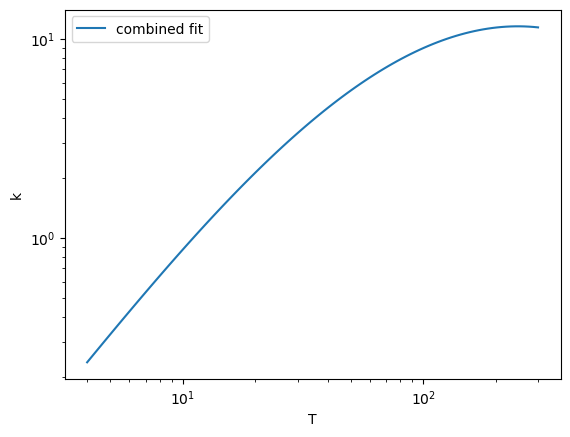

Nickel_Steel_Fe_2.25_Ni polylog


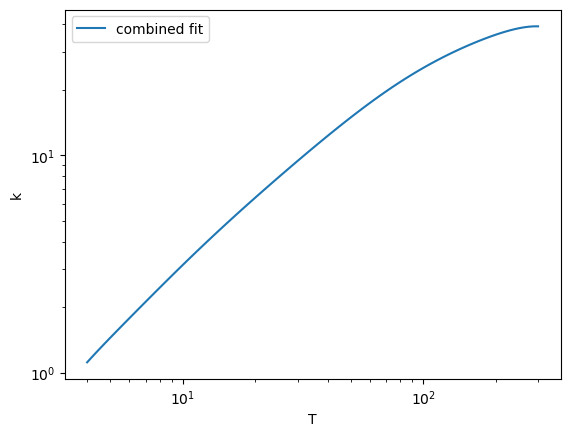

Nickel_Steel_Fe_3.25_Ni polylog


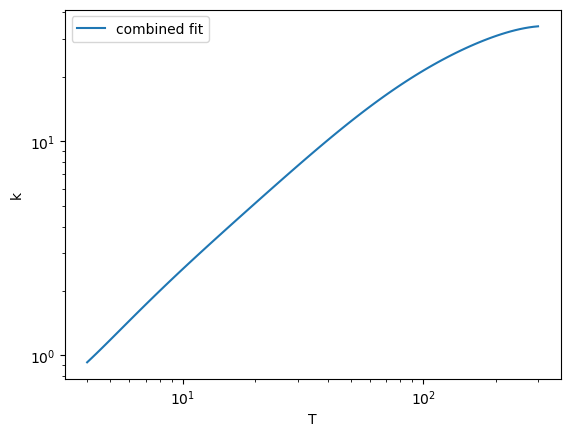

Nickel_Steel_Fe_5.0_Ni polylog


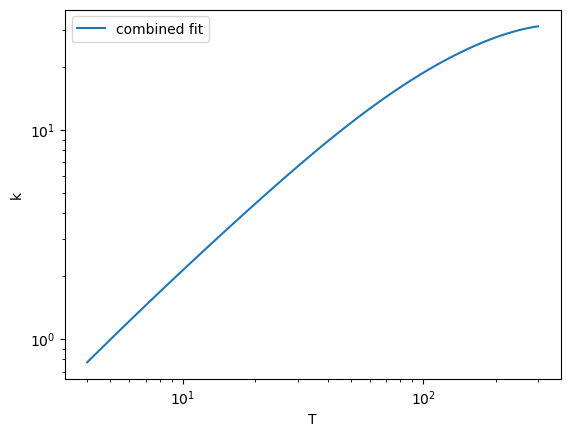

Nickel_Steel_Fe_9.0_Ni polylog


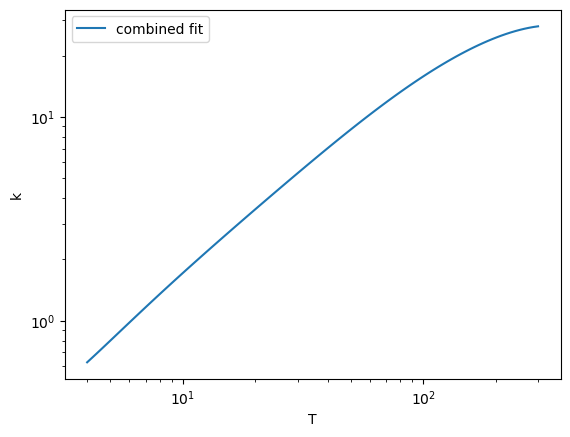

Nylon polylog


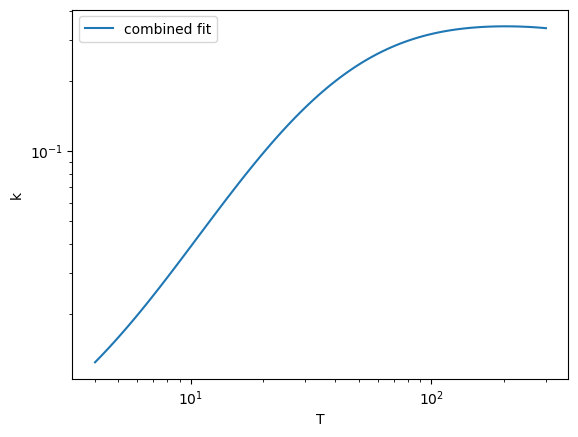

Phosbronze lowTextrapolate


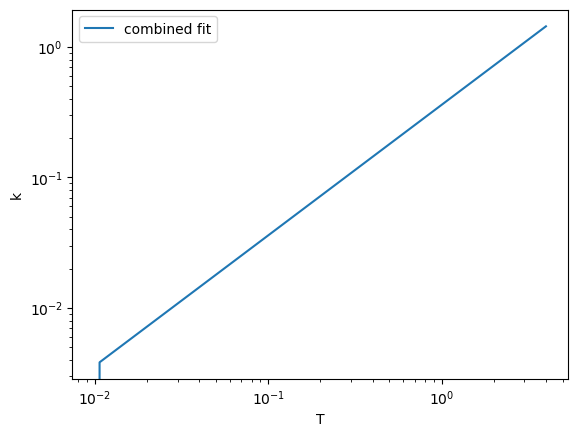

Phosbronze2 lowTextrapolate


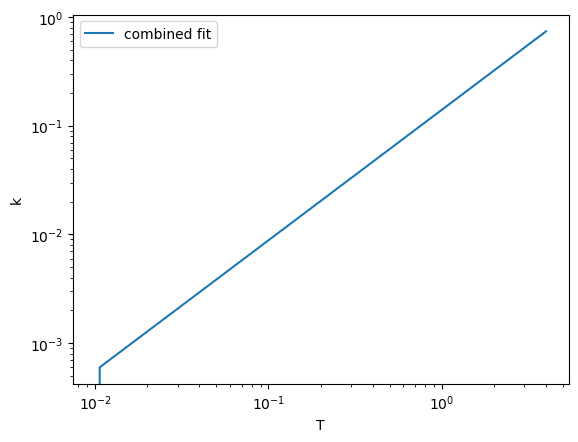

Phosbronze3 lowTextrapolate


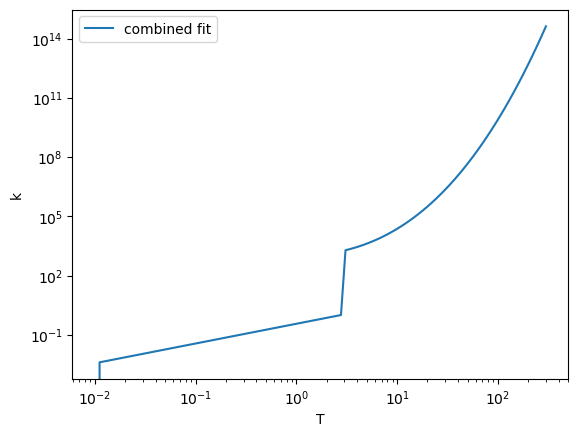

Phosphorbronze polylog


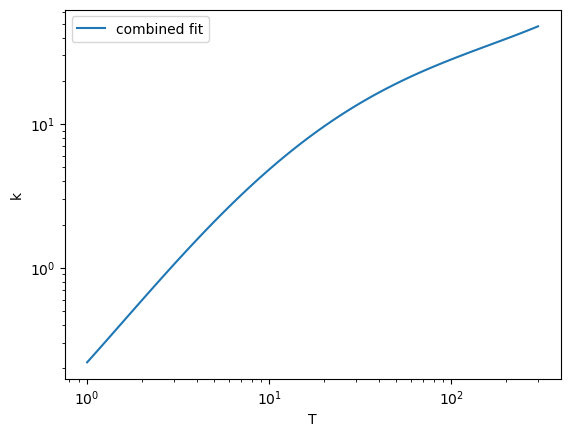

Platinum polylog


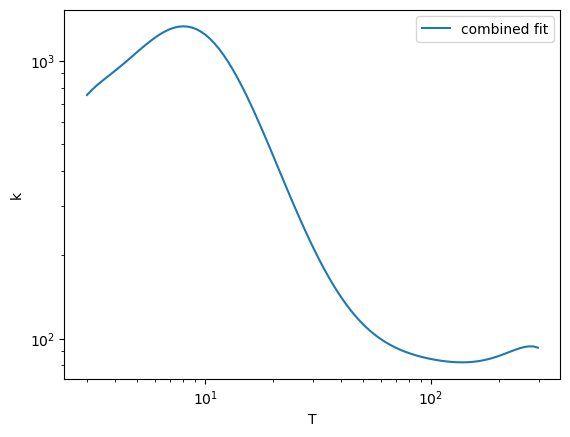

Polystyrene_1.99_lbft3_Freon polylog


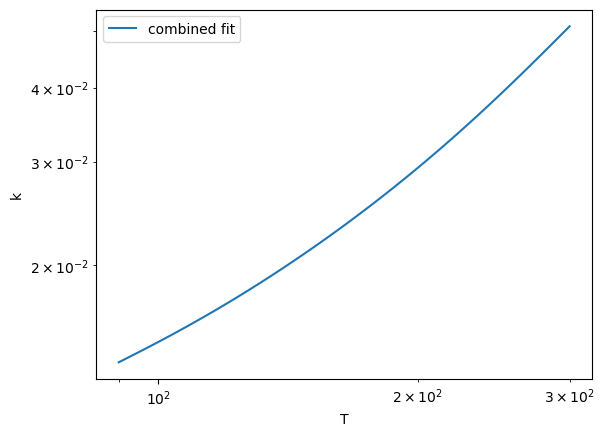

Polystyrene_2.0_lbft3 polylog


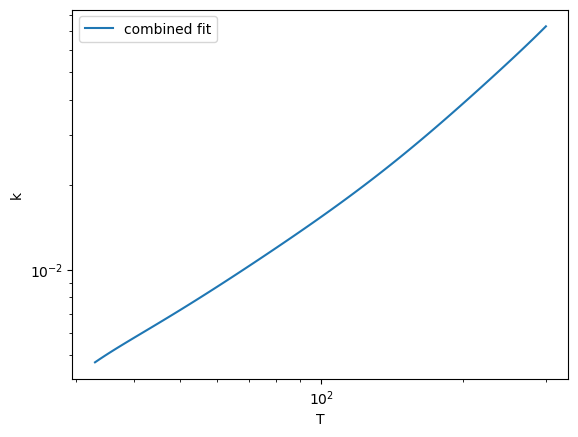

Polystyrene_3.12_lbft3 polylog


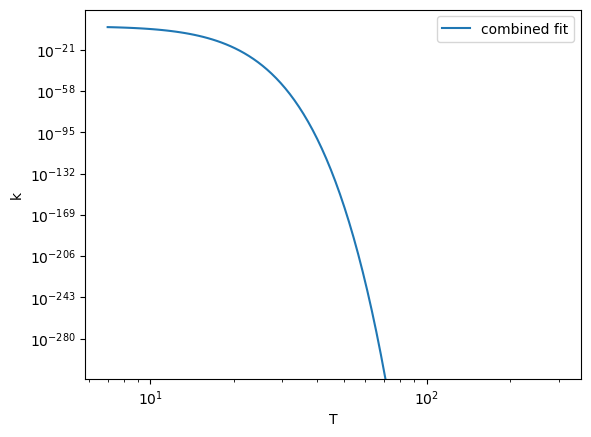

Polystyrene_6.24_lbft3 polylog


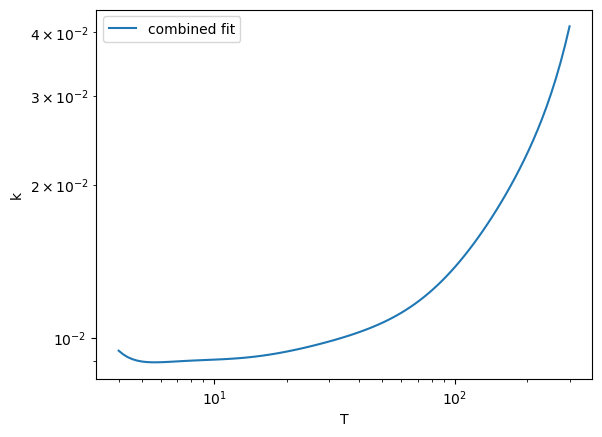

Polyurethane_1.99_lbft3_Freon polylog


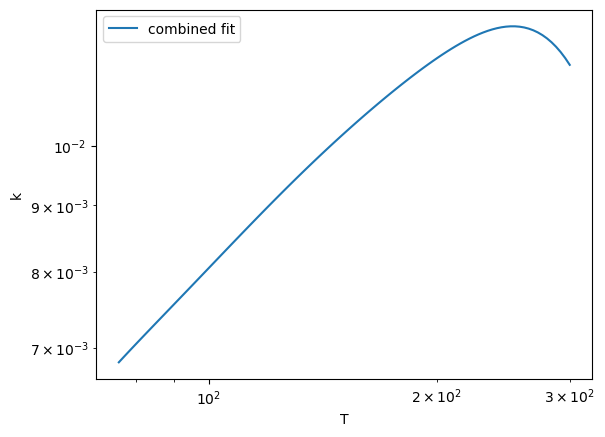

Polyurethane_2.0_lbft3_CO2 polylog


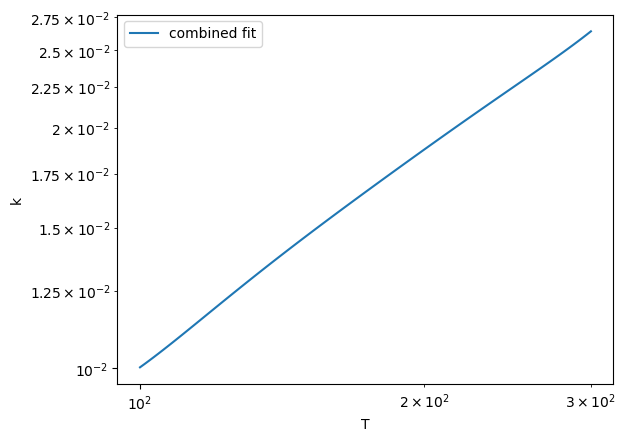

Polyurethane_3.06_lbft3_He polylog


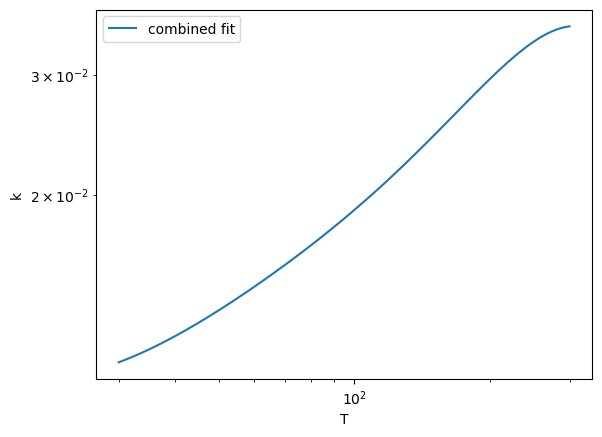

Polyurethane_4.00_lbft3_Freon polylog


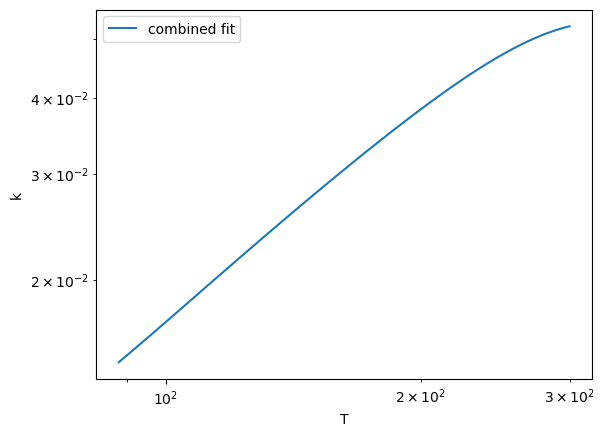

PVC_1.25_lbft3_air polylog


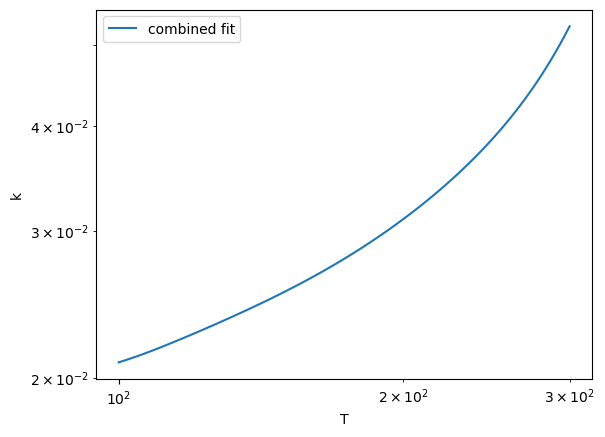

PVC_3.5_lbft3_CO2 polylog


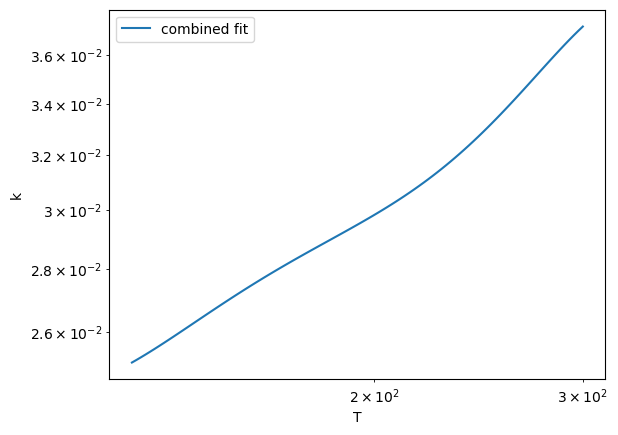

Stainless_Steel comppoly


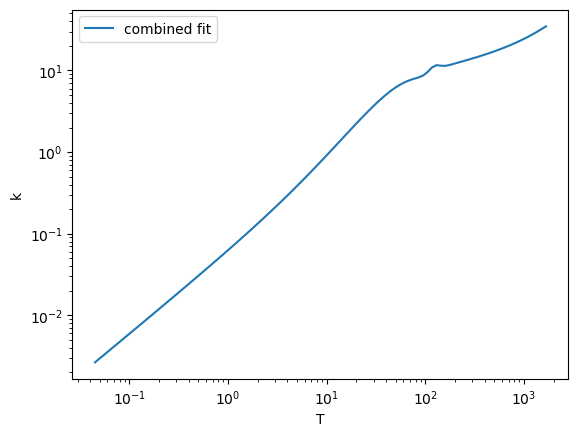

Stainless_Steel_304 comppoly


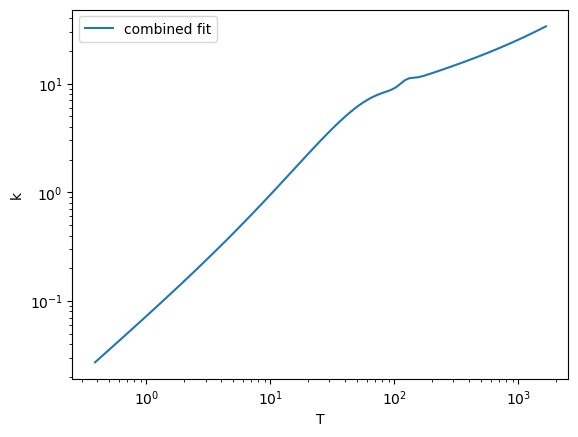

Stainless_Steel_304L polylog


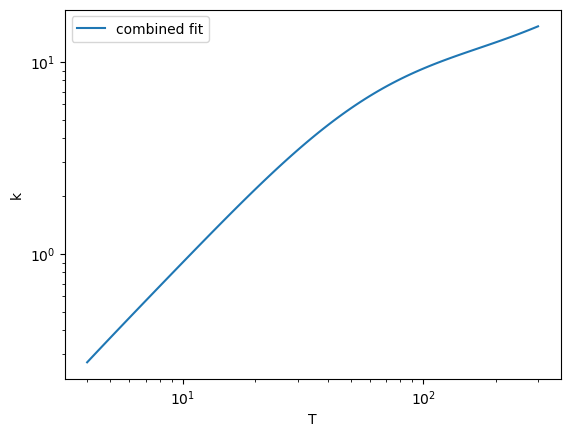

Stainless_Steel_310_lo 3 order Nppoly


KeyError: '3 order Nppoly'

In [4]:
for mat in mat_names[1:]: # ["Graphite"]: # 
    param_dictionary = get_parameters(mat)
    T = np.logspace(np.log10(param_dictionary["fit_range"][0]),np.log10(param_dictionary["fit_range"][1]),100)
    print(mat, param_dictionary["fit_type"])

    func = get_func_type(param_dictionary["fit_type"])
    y_pred = func(T, param_dictionary)

    plt.plot(T, y_pred, label='combined fit')
    plt.semilogx()
    plt.semilogy()
    plt.ylabel("k")
    plt.xlabel("T")
    plt.legend()
    plt.show()

In [ ]:
def get_thermal_conductivity(T_range, k_func):
    x = np.linspace(T_range[0], T_range[1], 1000)
    print(low_param)
    y = k_func(x, low_param)
    ConInt = np.trapz(y, x)
    return ConInt

In [ ]:
k = get_thermal_conductivity([0.450, 0.459], func) #W/m
P = 0.0016174*k*10

NameError: name 'low_param' is not defined

In [ ]:
print(P)

3.9295268837837903e-07


In [ ]:
def integrand(t, param):

    return t*np.polyval(param, t)
ConIntQuad = quad(integrand, 0.007, 0.067, low_param)

In [ ]:
print(ConIntQuad[0]*0.0016174*10)

1.5176802000507042e-07
